# Fig4. Disciplinary backgrounds of researchers working in Digital Humanities 

#### Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import Counter

def read_csv(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_csv(path)
    filtered_df = df.replace(np.nan, '-', regex=True)
    
    
    return filtered_df

#### Define researchers data path

In [2]:
file_path = "data/mapeo_investigadores.csv"

#### Define function to clean researchers data

In [3]:
def prepare_data(data):
    mini = data[["Área de procedencia/disciplina","ID investigador"]]
    mini.columns = ["disciplina", "id"]
    # new_disc = [tema.split(", ") for tema in mini[mini["disciplina"].str.contains(',')]["disciplina"]]
    # mini.loc[mini["disciplina"].str.contains(','), "disciplina"] = new_disc
    grouped = mini.groupby("disciplina")
    df2 = grouped.count().reset_index().sort_values(by=['id'], ascending=False).head(15)
    return df2

#### Run program

In [4]:
investigadores = read_csv(file_path)
df2 = prepare_data(investigadores)

#### Print horizontal bar plot

<Figure size 432x288 with 0 Axes>

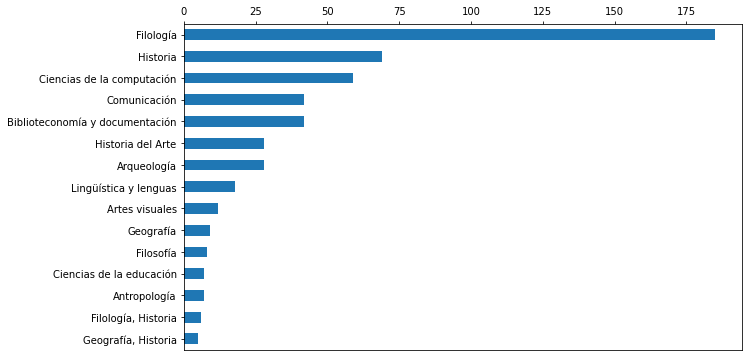

In [5]:
plt.figure()
ax = df2.plot.barh(x='disciplina', y='id', figsize=(10,6), legend=False)
ax.set_ylabel("")
ax.xaxis.tick_top() 
ax.invert_yaxis()
plt.show()